In [339]:
import matplotlib.pyplot as plt
import squarify
import sys
import os
import numpy as np

# Import the subarea_map from the utils module
sys.path.append(os.path.join(os.path.dirname(os.path.abspath("__file__")), "../../../"))



In [340]:
# Data
categories = {
    "Graph-Based & Neurosymbolic Learning": 95,
    "Reinforcement Learning & Robotics": 260,
    "Representation Learning": 89,
    "Infrastructure, Benchmarks & Evaluation": 77,
    "Optimization": 200,
    "Generative Models": 265,
    "Learning Theory": 334,
    "Probabilistic & Causal Methods": 149,
    "Human-AI Interaction and Ethics": 241,
    "Applications to Sciences & Engineering": 254,
    "Natural Language, Vision & Multimodal Learning": 463,
    "Others": 129,
}

# Sort categories by count
sorted_categories = dict(sorted(categories.items(), key=lambda x: x[1], reverse=True))

# Prepare data for squarify
sizes = list(sorted_categories.values())
total_papers = sum(sizes)

# Wrap labels to fit in boxes and include percentages
def wrap_label(text, count, max_chars=23):
    # Calculate percentage
    percentage = (count / total_papers) * 100
    
    # Split the text into words
    words = text.split()
    lines = []
    current_line = []
    current_length = 0

    for word in words:
        if current_length + len(word) + 1 <= max_chars:
            current_line.append(word)
            current_length += len(word) + 1
        else:
            lines.append(" ".join(current_line))
            current_line = [word]
            current_length = len(word)

    if current_line:
        lines.append(" ".join(current_line))

    # Add count and percentage to the last line
    lines[-1] = f"{lines[-1]}\n({count}, {percentage:.1f}%)"
    return "\n".join(lines)


# labels = [wrap_label(k, v) for k, v in sorted_categories.items()]

# Viridis color palette - perceptually uniform and colorblind-friendly
# colors = plt.cm.viridis(np.linspace(0, 0.9, len(categories)))

# use Spectral
colors = plt.cm.Spectral(np.linspace(0, 1, len(categories)))


In [341]:
labels = ['Natural Language,\nVision & Multimodal\nLearning\n(463, 18.1%)',
 'Learning Theory\n(334, 13.1%)',
 'Generative Models\n(265, 10.4%)',
 'Reinforcement Learning\n& Robotics\n(260, 10.2%)',
 'Applications to\nSciences & Engineering\n(254, 9.9%)',
 'Human-AI Interaction\nand Ethics\n(241, 9.4%)',
 'Optimization\n(200, 7.8%)',
 'Probabilistic & Causal\nMethods\n(149, 5.8%)',
 'Others\n(129, 5.0%)',
 'Graph-Based &\nNeurosymbolic \nLearning\n(95, 3.7%)',
 'Representation\nLearning\n(89, 3.5%)',
 'Infrastructure, Benchmarks & \nEvaluation (77, 3.0%)']

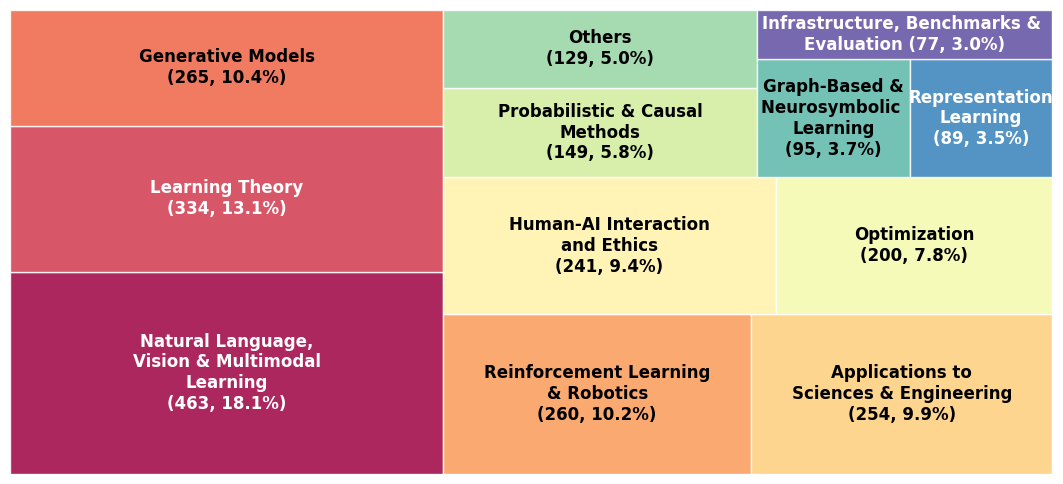

In [342]:
# Function to determine text color based on background color brightness
def get_text_color(bg_color):
    r, g, b = bg_color[:3]
    brightness = (0.299 * r + 0.587 * g + 0.114 * b)
    return "white" if brightness < 0.5 else "black"

# Create and save the treemap
def create_treemap(save=True, alpha=0.9, pad=True, fontsize=12, figsize=(13, 8)):
    plt.figure(figsize=figsize)
    ax = squarify.plot(
        sizes=sizes,
        label=labels,
        color=colors,
        alpha=alpha,
        text_kwargs={"fontsize": fontsize},
        pad=pad
    )
    
    # Update text colors based on background
    rectangles = ax.patches
    texts = ax.texts
    for i, rect in enumerate(rectangles):
        if i < len(colors):
            rect_color = colors[i]
            text_color = get_text_color(rect_color)
            for text in texts:
                if (rect.get_x() <= text.get_position()[0] <= rect.get_x() + rect.get_width() and 
                    rect.get_y() <= text.get_position()[1] <= rect.get_y() + rect.get_height()):
                    text.set_color(text_color)
    
    # Set titles and layout
    plt.axis("off")
    # plt.suptitle("Distribution of Papers by Primary Area", fontsize=12, fontweight="bold", y=0.98)
    # plt.title(f"Total: {total_papers} papers", fontsize=12, fontweight="bold", pad=5)
    plt.tight_layout()
    
    # Save if requested
    if save:
        plt.savefig("primary_area_treemap.pdf", dpi=300, bbox_inches="tight")
    
    plt.show()

# Create and display the treemap
create_treemap(save=True, alpha=0.85, pad=False, fontsize=12, figsize=(11, 5))